# Linear Regress with regularization: variance and bias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as op

path = 'ex5data1.mat'

## data import and show

In [2]:
def load_mat(path):
    data = loadmat(path)
    return data['X'],data['y'],data['Xval'],data['yval'],data['Xtest'],data['ytest']

In [3]:
def ployData(X,y):
    plt.scatter(X, y, marker='x', c='r')
    plt.ylabel('Change in water level')
    plt.xlabel('Water flowing out of the dam')

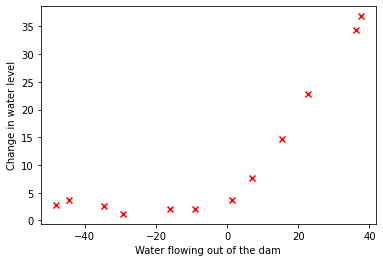

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = load_mat(path)
ployData(X_train,y_train)

## Regression

### data prepare

In [5]:
X_train = np.insert(X_train, 0,values=1,axis=1)
X_val = np.insert(X_val, 0,values=1,axis=1)
X_test = np.insert(X_test, 0,values=1,axis=1)


### cost function

In [6]:
def costFunction_reg(theta,X,y,lmbd):
    """
    X: R(m*n), m records, n features
    y: R(m)
    theta : R(n), linear regression parameters
    """
    m = X.shape[0]
    theta = theta.reshape(len(theta),1)
    inner = X @ theta - y  # R(m*1)
    square_sum = inner.T @ inner
    J = square_sum / (2 * m)
    J += lmbd*np.sum(theta[1:]**2)/(2*m)
    return np.squeeze(J)

### gradient

In [7]:
def gradient_reg(theta,X,y,lmbd):
    m = X.shape[0]
    theta = theta.reshape(len(theta),1)
    grad = X.T @ (X @ theta - y)
    grad /= m
    reg = theta.copy()  # same shape as theta
    reg[0] = 0  # don't regularize intercept theta
    reg *= lmbd / m
    grad += reg
    return np.squeeze(grad)

In [8]:
print(costFunction_reg(np.ones((X_train.shape[1],1)),X_train,y_train,lmbd=1))
print(gradient_reg(np.ones((X_train.shape[1],1)),X_train,y_train,lmbd=1))

303.9931922202643
[-15.30301567 598.25074417]


### optimize

In [9]:
def TrainLinearReg(X, y, lambd):
    theta = np.ones(X.shape[1])
    res = op.minimize(fun=costFunction_reg,
                      x0=theta,
                      args=(X, y, lambd),
                      method='TNC',
                      jac=gradient_reg,
                      options={'disp': True})
    return res.x


### show predict curve

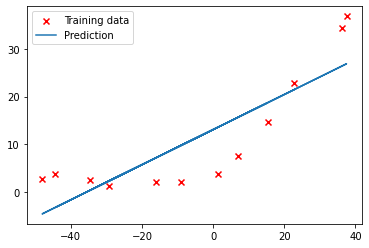

In [10]:
res = TrainLinearReg(X_train,y_train,lambd=1)
b = res[0] # intercept
k = res[1] # slope

plt.scatter(X_train[:,1], y_train,marker='x', c='r', label="Training data")
plt.plot(X_train[:, 1], X_train[:, 1]*k + b, label="Prediction")
plt.legend(loc=2)
plt.show()

## Variance and bias

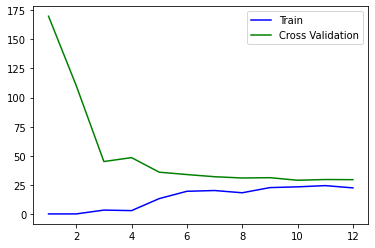

In [11]:
def plot_learning_curve(X,y,X_val,y_val,lambd):
    his_train, his_val = [], []
    size = range(1,len(X)+1)
    for i in size:
        i_theta = TrainLinearReg(X[:i,:],y[:i,:],lambd)
        i_train_cost = costFunction_reg(i_theta,X[:i,:],y[:i,:],0)
        i_val_cost = costFunction_reg(i_theta,X_val,y_val,0)
        his_train.append(i_train_cost)
        his_val.append(i_val_cost)
    plt.plot(size, his_train, label='Train',color='blue')
    plt.plot(size,his_val,label='Cross Validation',color='green')
    plt.legend(loc=1)
    plt.show()

plot_learning_curve(X_train,y_train,X_val,y_val,0)

## Polynominal Regression

feature map: to $x^i$ only. $ i \in (0,power]$

In [12]:
def poly_feature(X,power):
    Xpoly = X.copy()
    for p in range(2,power+1):
        Xpoly=np.insert(Xpoly, Xpoly.shape[1], Xpoly[:,1]**p, axis=1)
    return Xpoly

poly_feature(X_train, 3)


array([[ 1.00000000e+00, -1.59367581e+01,  2.53980260e+02,
        -4.04762197e+03],
       [ 1.00000000e+00, -2.91529792e+01,  8.49896197e+02,
        -2.47770062e+04],
       [ 1.00000000e+00,  3.61895486e+01,  1.30968343e+03,
         4.73968522e+04],
       [ 1.00000000e+00,  3.74921873e+01,  1.40566411e+03,
         5.27014222e+04],
       [ 1.00000000e+00, -4.80588295e+01,  2.30965109e+03,
        -1.10999128e+05],
       [ 1.00000000e+00, -8.94145794e+00,  7.99496701e+01,
        -7.14866612e+02],
       [ 1.00000000e+00,  1.53077929e+01,  2.34328523e+02,
         3.58705250e+03],
       [ 1.00000000e+00, -3.47062658e+01,  1.20452489e+03,
        -4.18045609e+04],
       [ 1.00000000e+00,  1.38915437e+00,  1.92974986e+00,
         2.68072045e+00],
       [ 1.00000000e+00, -4.43837599e+01,  1.96991814e+03,
        -8.74323736e+04],
       [ 1.00000000e+00,  7.01350208e+00,  4.91892115e+01,
         3.44988637e+02],
       [ 1.00000000e+00,  2.27627489e+01,  5.18142738e+02,
      

nomalize the input data

In [13]:
def get_mean_std(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0,ddof=1)
    return mean, std

def featureNorm(X,u,sigma):
    X[:,1:] -= u[1:]
    X[:,1:] /= sigma[1:]
    return X

### set hyperparameter

In [14]:
power = 8
lambd = 1

### prepare norm data

In [15]:
u, sigma = get_mean_std(poly_feature(X_train,power=power))
X_train_norm = featureNorm(poly_feature(X_train,power),u,sigma)
X_val_norm = featureNorm(poly_feature(X_val,power),u,sigma)
X_test_norm = featureNorm(poly_feature(X_test,power),u,sigma)

## deferent lambda

In [16]:
def plot_fit(u, sigma,lambd):
    theta = TrainLinearReg(X_train_norm, y_train,lambd).reshape(-1,1)
    xx = np.arange(-65,65,0.5).reshape(-1,1)
    y_pre = featureNorm(poly_feature(np.insert(xx,0,values=1,axis=1),power),u,sigma)
    y_pre = y_pre@theta
    plt.plot(xx,y_pre,label = "Predict data")
    plt.scatter(X_train[:,1], y_train, marker='x', c='r',label="Original data")
    plt.legend()
    plt.show()

$ \lambda = 0$

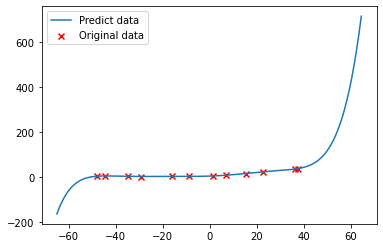

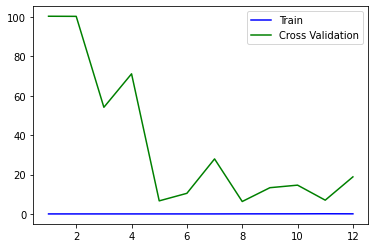

In [17]:
plot_fit(u,sigma,lambd=0)
plot_learning_curve(X_train_norm,y_train,X_val_norm,y_val,lambd=0)

$ \lambda = 1$

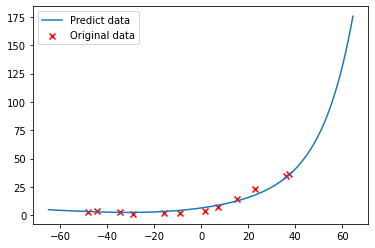

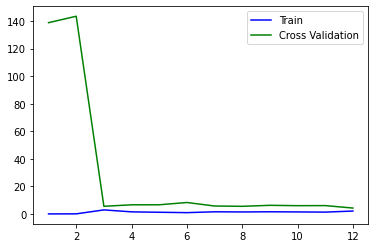

In [18]:
plot_fit(u,sigma,lambd=1)
plot_learning_curve(X_train_norm,y_train,X_val_norm,y_val,lambd=1)

### using valid set to choose lambda

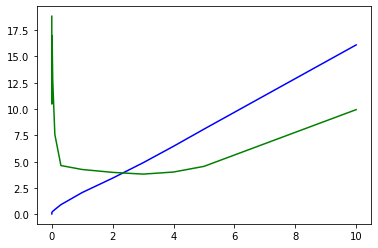

In [19]:
lambda_list = [0., 0.001, 0.003, 0.01,0.03, 0.1, 0.3, 1.,2., 3.,4.,5., 10.]

def check_diff_lambd(ls):
    train_his , valid_his = [], []
    xx = ls
    for ld in lambda_list:
        theta=TrainLinearReg(X_train_norm,y_train,ld)
        train_his.append(costFunction_reg(theta,X_train_norm,y_train,0))
        valid_his.append(costFunction_reg(theta,X_val_norm,y_val,0))
    plt.plot(xx,train_his,c='b')
    plt.plot(xx,valid_his,c='g')
    plt.show()

check_diff_lambd(lambda_list)


## calculate the loss on test set

In [20]:
theta = TrainLinearReg(X_train_norm,y_train, 3)
print(f'When lambda is {3}, he loss on test set is {costFunction_reg(theta,X_test_norm,y_test,0)}')

When lambda is 3, he loss on test set is 3.8598858166268943
